In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
r300k = {'width': [1.4, 1.3, 1, 0.75, 0.5, 0.35, 1, 1, 1], 
     'res': [224, 224, 224, 224, 224, 224, 192, 160, 128], 
     'IOU=0.5': [0.140, 0.143, 0.127, 0.123, 0.091, 0.071, 0.112, 0.091, 0.059], 
     'IOU=0.75': [0.075, 0.077, 0.068, 0.061, 0.046, 0.033, 0.057, 0.040, 0.026], 
     'IOU=0.5:0.95': [0.076, 0.078, 0.071,0.066, 0.050, 0.037, 0.060, 0.047, 0.030], 
     'speed': [0.095,0.085, 0.064,0.059, 0.044, 0.040, 0.060, 0.051, 0.049],
     'FLOPs': [8457, 8457, 8457, 8457, 8457, 8457, 6233, 4637, 2937],
     'Params': [7830962, 6987077, 4707674, 3130714, 1815098, 1154634, 4707674, 4707674, 4707674]
    }
r800k = {'width': [1.4, 1.3, 1, 0.75, 0.5, 0.35, 1, 1, 1], 
         'res': [224, 224, 224, 224, 224, 224, 300, 192, 160], 
         'accuracy': [0.2 , 0.203, 0.173, 0.153, 0.125, 0.106, 0.193, 0.147, 0.123],
         'speed': [66.7, 58.9, 53.7, 51.8, 39.6, 37.5, 72.8, 51.3, 40.6],
         'in_speed': [138.0, 123.0, 73.8, 55.8, 28.7, 19.7, 0.0, 55.1, 40.2],
         'FLOPs': [8457, 8457, 8457, 8457, 8457, 8457, 15725, 6233, 4637],
         'Params': [7830962, 6987077, 4707674, 3130714, 1815098, 1733874, 4707674, 6739290, 6739290]
        }
#df = pd.DataFrame(data=r300k)
df = pd.DataFrame(data=r800k)
df

,width,res,accuracy,speed,in_speed,FLOPs,Params
0,1.40,224,0.200,66.7,138.0,8457,7830962
1,1.30,224,0.203,58.9,123.0,8457,6987077
2,1.00,224,0.173,53.7,73.8,8457,4707674
3,0.75,224,0.153,51.8,55.8,8457,3130714
4,0.50,224,0.125,39.6,28.7,8457,1815098
5,0.35,224,0.106,37.5,19.7,8457,1733874
6,1.00,300,0.193,72.8,0.0,15725,4707674
7,1.00,192,0.147,51.3,55.1,6233,6739290
8,1.00,160,0.123,40.6,40.2,4637,6739290


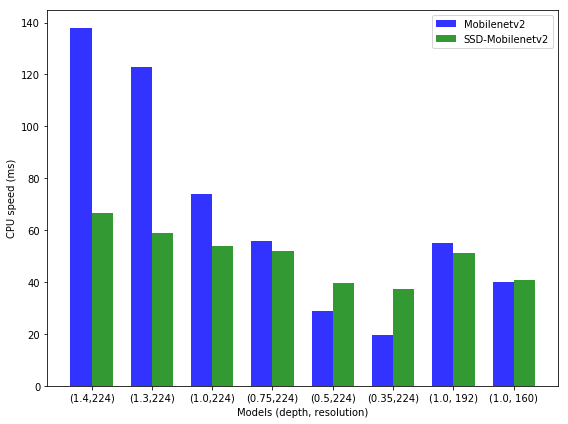

In [66]:
# plot bar graph comparison of speeds
speed_det = (66.7, 58.9, 53.7, 51.8, 39.6, 37.5, 51.3, 40.6)
speed_clas = (138.0, 123.0, 73.8, 55.8, 28.7, 19.7, 55.1, 40.2)
n_groups = 8
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, speed_clas, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Mobilenetv2')
 
rects2 = plt.bar(index + bar_width, speed_det, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SSD-Mobilenetv2')

plt.xlabel('Models (depth, resolution)')
plt.ylabel('CPU speed (ms)')
plt.xticks(index + bar_width/2, ('(1.4,224)', '(1.3,224)', '(1.0,224)', '(0.75,224)', '(0.5,224)', '(0.35,224)', '(1.0, 192)', '(1.0, 160)'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [9]:
df.loc[df['res']==224]['accuracy'].tolist()

[0.2, 0.203, 0.173, 0.153, 0.125, 0.106]

In [11]:
df.loc[df['res']==224]['width'].tolist()

[1.4, 1.3, 1.0, 0.75, 0.5, 0.35]

[]

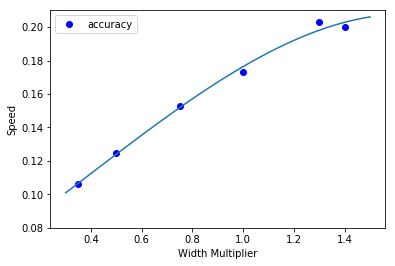

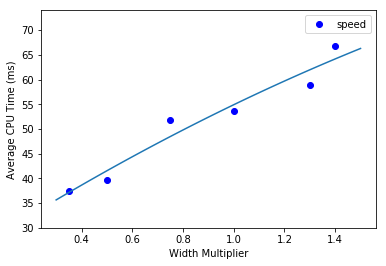

In [62]:
# varying width, constant resolution with different IoUs
acc = df.loc[df['res']==224]['accuracy'].tolist()
width = df.loc[df['res']==224]['width'].tolist()
za = np.polyfit(width, acc, 3)
pa = np.poly1d(za)
xp = np.linspace(0.3, 1.5, 100)

ap_width = df.loc[df['res']==224]
ax = ap_width.plot(x='width', y='accuracy', style='bo', ylim=(0.08,0.21))
ax.plot(xp, pa(xp))
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Speed')
ax.legend()
ax.plot()

speed = df.loc[df['res']==224]['speed'].tolist()
zs = np.polyfit(width, speed, 2)
ps = np.poly1d(zs)

speed_width = df.loc[df['res']==224]
ax = speed_width.plot(x='width', y='speed', style='bo', ylim=(30, 74))
ax.plot(xp, ps(xp))
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Average CPU Time (ms)')
ax.plot()

[]

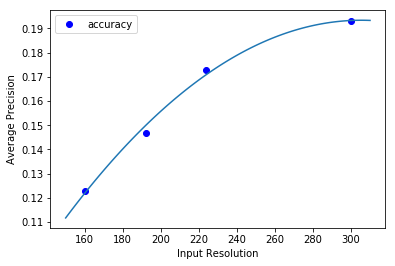

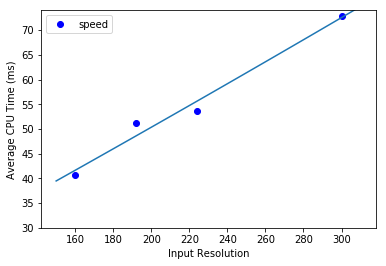

In [59]:
# varying resolution, constant width with different IoUs
acc = df.loc[df['width']==1]['accuracy'].tolist()
res = df.loc[df['width']==1]['res'].tolist()
za = np.polyfit(res, acc, 2)
pa = np.poly1d(za)
xp = np.linspace(150, 310, 100)

ap_res = df.loc[df['width']==1]
ax = ap_res.plot(x='res', y='accuracy', style='bo')
ax.plot(xp, pa(xp))
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Average Precision')
ax.legend()
ax.plot()

speed = df.loc[df['width']==1]['speed'].tolist()
zs = np.polyfit(res, speed, 2)
ps = np.poly1d(zs)

speed_res = df.loc[df['width']==1]
ax = speed_res.plot(x='res', y='speed', style='bo', ylim=(30,74))
ax.plot(xp, ps(xp))
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Average CPU Time (ms)')
ax.plot()

[]

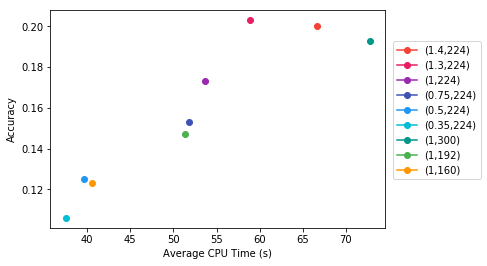

In [67]:
# speed vs parameters
ax = df.loc[(df['width']==1.4) & (df['res']==224)].plot(x='speed', y='accuracy', color='#f44336', marker='o', label='(1.4,224)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#e91e63', marker='o', label='(1.3,224)')
df.loc[(df['width']==1) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#9c27b0', marker='o', label='(1,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#3f51b5', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#2196f3', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.35) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#00bcd4', marker='o', label='(0.35,224)')
df.loc[(df['width']==1) & (df['res']==300)].plot(ax=ax, x='speed', y='accuracy', color='#009688', marker='o', label='(1,300)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='accuracy', color='#4caf50', marker='o', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='accuracy', color='#ff9800', marker='o', label='(1,160)')
ax.set_xlabel('Average CPU Time (s)') 
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right', bbox_to_anchor=(1.3, 0.2))
ax.plot()

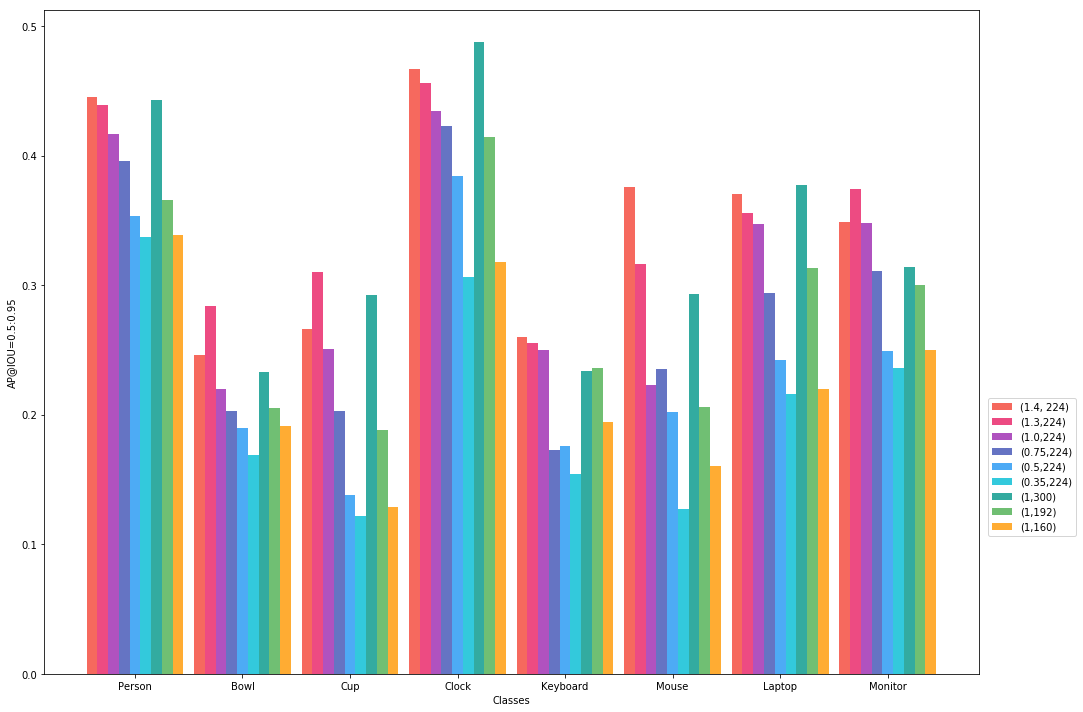

In [108]:
# class by class comparison
m14_224 = (0.445, 0.246, 0.266, 0.467, 0.26, 0.376, 0.37, 0.349)
m13_224 = (0.439, 0.284, 0.31, 0.456, 0.255, 0.316, 0.356, 0.374)
m1_224 = (0.417, 0.22, 0.251, 0.434, 0.25, 0.223, 0.347, 0.348)
m075_224 = (0.396, 0.203, 0.203, 0.423, 0.173, 0.235, 0.294, 0.311)
m05_224 = (0.353, 0.19, 0.138, 0.384, 0.176, 0.202, 0.242, 0.249)
m035_224 = (0.337, 0.169, 0.122, 0.306, 0.154, 0.127, 0.216, 0.236)
m1_300 = (0.443, 0.233, 0.292, 0.488, 0.234, 0.293, 0.377, 0.314)
m1_192 = (0.366, 0.205, 0.188, 0.414, 0.236, 0.206, 0.313, 0.3)
m1_160 = (0.339, 0.191, 0.129, 0.318, 0.194, 0.16, 0.22, 0.25)

n_groups = 8
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, m14_224, bar_width,
                 alpha=opacity,
                 color='#f44336',
                 label='(1.4, 224)')
rects2 = plt.bar(index + bar_width, m13_224, bar_width,
                 alpha=opacity,
                 color='#e91e63',
                 label='(1.3,224)')
rects3 = plt.bar(index + 2*bar_width, m1_224, bar_width,
                 alpha=opacity,
                 color='#9c27b0',
                 label='(1.0,224)')
rects4 = plt.bar(index + 3*bar_width, m075_224, bar_width,
                 alpha=opacity,
                 color='#3f51b5',
                 label='(0.75,224)')
rects5 = plt.bar(index + 4*bar_width, m05_224, bar_width,
                 alpha=opacity,
                 color='#2196f3',
                 label='(0.5,224)')
rects6 = plt.bar(index + 5*bar_width, m035_224, bar_width,
                 alpha=opacity,
                 color='#00bcd4',
                 label='(0.35,224)')
rects7 = plt.bar(index + 6*bar_width, m1_300, bar_width,
                 alpha=opacity,
                 color='#009688',
                 label='(1,300)')
rects8 = plt.bar(index + 7*bar_width, m1_192, bar_width,
                 alpha=opacity,
                 color='#4caf50',
                 label='(1,192)')
rects9 = plt.bar(index + 8*bar_width, m1_160, bar_width,
                 alpha=opacity,
                 color='#ff9800',
                 label='(1,160)')


plt.xlabel('Classes')
plt.ylabel('AP@IOU=0.5:0.95')
plt.xticks(index + bar_width*8/2, ('Person', 'Bowl', 'Cup', 'Clock', 'Keyboard', 'Mouse', 'Laptop', 'Monitor'))
plt.legend(loc='lower right', bbox_to_anchor=(1.11, 0.2))
 
plt.tight_layout()
plt.show()